#need to adjust the last pie chart

#country suggestion do a chart? like dot overlapping

Main Question: how do we attract more people to try out company's cleaning products?

In [2]:
#import libraries

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [139]:
#import 2 datasets

In [140]:
df = pd.read_csv('country1.csv', skiprows=9)

In [141]:
df_channel = pd.read_csv('ga_source.csv', skiprows=9)

In [8]:
#describe the data

In [ ]:
#dataset1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    161 non-null    object 
 1   Users                      161 non-null    int64  
 2   New users                  161 non-null    int64  
 3   Sessions                   161 non-null    int64  
 4   Views                      161 non-null    int64  
 5   Bounce rate                161 non-null    float64
 6   Conversions                161 non-null    int64  
 7   Engaged sessions           161 non-null    int64  
 8   Engagement rate            161 non-null    float64
 9   Engaged sessions per user  161 non-null    float64
 10  Average engagement time    161 non-null    float64
 11  Event count                161 non-null    int64  
 12  Total revenue              161 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 1

In [10]:
df.head()

,Country,Users,New users,Sessions,Views,Bounce rate,Conversions,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Total revenue
0,Vietnam,1639,1636,1887,2736,0.734499,0,501,0.265501,0.305674,12.779134,7723,0
1,United States,1087,1073,1329,3737,0.477050,28,695,0.522950,0.639374,49.682613,9275,0
2,China,829,643,875,809,0.898286,0,89,0.101714,0.107358,4.303981,2634,0
3,Philippines,693,694,771,1146,0.625162,9,289,0.374838,0.417027,22.709957,3446,0
4,Indonesia,677,677,758,1023,0.608179,0,297,0.391821,0.438700,17.701625,3203,0


In [ ]:
#dataset2

In [105]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   First user default channel group  7 non-null      object 
 1   New users                         7 non-null      int64  
 2   Engaged sessions                  7 non-null      int64  
 3   Engagement rate                   7 non-null      float64
 4   Engaged sessions per user         7 non-null      float64
 5   Average engagement time           7 non-null      float64
 6   Event count                       7 non-null      int64  
 7   Conversions                       7 non-null      int64  
 8   Total revenue                     7 non-null      int64  
 9   conversion rate                   7 non-null      float64
 10  rate                              7 non-null      float64
dtypes: float64(5), int64(5), object(1)
memory usage: 748.0+ bytes


In [106]:
df_channel.head()

,First user default channel group,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue,conversion rate,rate
0,Organic Search,5720,4815,0.608646,0.841930,79.771988,56616,150,0,2.622378,0.445691
1,Cross-network,2590,920,0.327986,0.355350,18.224411,11546,5,0,0.193050,0.201808
2,Direct,2379,1442,0.402344,0.556113,54.718087,21623,19,0,0.798655,0.185367
3,Paid Search,1972,888,0.409783,0.450304,22.150101,10309,22,0,1.115619,0.153654
4,Referral,131,149,0.662222,1.137405,134.870229,2389,6,0,4.580153,0.010207


In [11]:
#clean data

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Country                      0
Users                        0
New users                    0
Sessions                     0
Views                        0
Bounce rate                  0
Conversions                  0
Engaged sessions             0
Engagement rate              0
Engaged sessions per user    0
Average engagement time      0
Event count                  0
Total revenue                0
dtype: int64

In [107]:
df_channel.duplicated().sum()

0

In [108]:
df_channel.isnull().sum()

First user default channel group    0
New users                           0
Engaged sessions                    0
Engagement rate                     0
Engaged sessions per user           0
Average engagement time             0
Event count                         0
Conversions                         0
Total revenue                       0
conversion rate                     0
rate                                0
dtype: int64

Comment: the data is clean. We can start the analysis.

Part 1: what countries should we target for future marketing campaigns?

What are the top 10 countries that have the most users?

In [17]:
#Rank the Users by Country
df_sorted_users = df.sort_values(by='Users', ascending=False)

In [123]:
#Extract the top 5 rows with only 'Country' and 'Users' columns
top_10_users = df_sorted_users[['Country', 'Users','Conversions']].head(10)

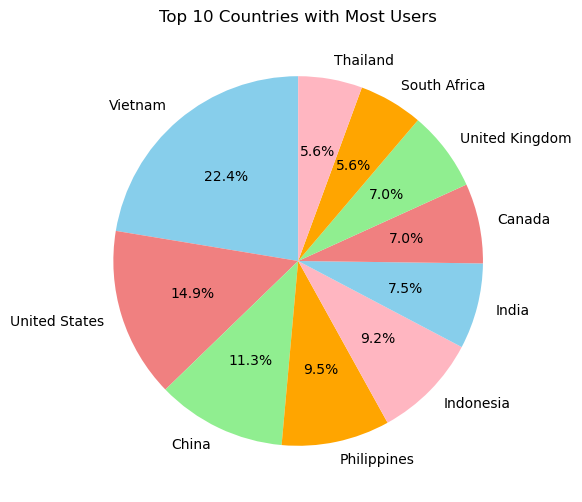

In [134]:
plt.figure(figsize=(6, 6))
plt.pie(top_10_users['Users'], labels=top_10_users['Country'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink'])
plt.title('Top 10 Countries with Most Users')
plt.show()

Comment: the top countries that obtain volume are Vienam, United States, China, Philippines, and Indonesia. Our potential market that natually attract volumn are in the South East Asia and North America regions. 

What are the top 10 countries that have the most users?

In [21]:
df_sorted = df.sort_values(by='Conversions', ascending=False)
top_10_conversions = df_sorted[['Country', 'Conversions', 'Users']].head(10)

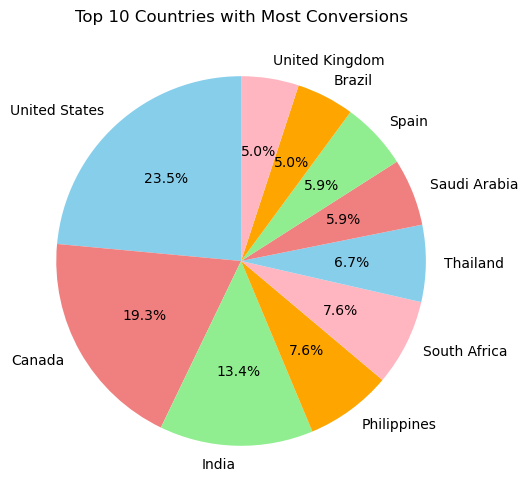

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(top_10_conversions['Conversions'], labels=top_10_conversions['Country'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink'])
plt.title('Top 10 Countries with Most Conversions')
plt.show()

Comment: the top countries that have the most conversions are United States, Canada, and India. The countries have the most conversion are mostly in North America which takes over the 42.8%, which also emphasizes that North America is big market that's worth putting future energy into.

What Countries are overlapping?

In [24]:
# Extract 'Country' columns from both DataFrames
conversions_countries = set(top_10_conversions['Country'])
users_countries = set(top_10_users['Country'])

# Find common countries
common_countries = conversions_countries.intersection(users_countries)

# Print the common countries
#print("Countries in both top 10 for Conversions and Users:", common_countries)

# Find countries in top_10_users but not in top_10_conversions
users_not_in_conversions = users_countries - conversions_countries
print("Countries in top 10 for Users but not in top 10 for Conversions:", users_not_in_conversions)

Countries in top 10 for Users but not in top 10 for Conversions: {'China', 'Indonesia', 'Vietnam'}


Comment: since the company has websites in China's search engine, we can find discrepancy between Users and Conversion in Vietnam and Indonesia. It's worth to investigate how we lost the users in Indonesia and Vienam from clicking the website to actual inquiry. Potential reasonings could be page load time at the region, contact methods, and language barriers.

What countries have the highest engagement rate?

In [63]:
df_sorted = df.sort_values(by='Sessions', ascending=False)
top_10_engagement = df_sorted[['Country', 'Sessions','Engaged sessions']].head(10)

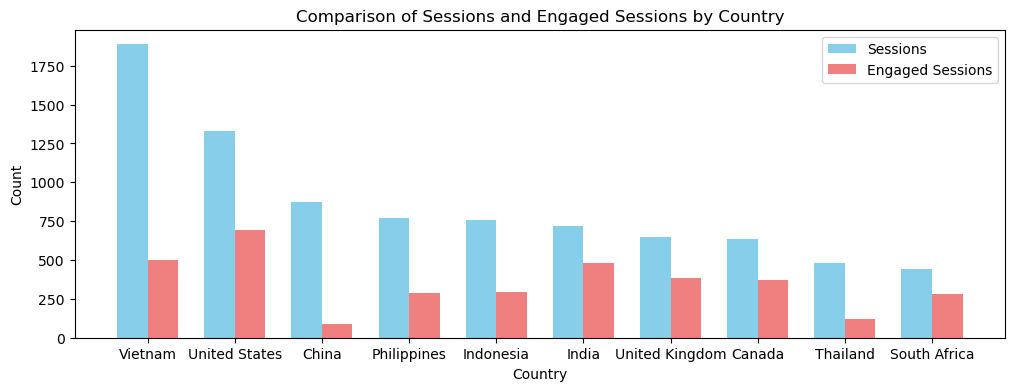

In [66]:
# Plotting the comparison bar graph
fig, ax = plt.subplots(figsize=(12, 4))

bar_width = 0.35
bar_positions1 = range(len(top_10_engagement['Country']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

plt.bar(bar_positions1, top_10_engagement['Sessions'], width=bar_width, label='Sessions', color='skyblue')
plt.bar(bar_positions2, top_10_engagement['Engaged sessions'], width=bar_width, label='Engaged Sessions', color='lightcoral')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Comparison of Sessions and Engaged Sessions by Country')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], top_10_engagement['Country'])
plt.legend()

plt.show()

Comment: The graph validates our assumption from previous data. The countries in English-Speaking countries seem to have a much higher engaged rate compared with other Non-English speaking countries. This could be very likely because the website is not tailored to the user experience in non-English speaking countries. One recommendation is that we can build a feature to auto-translate for the countries that we want to target at. 

What are the top 20 countries that have the longest engaged duration?

In [128]:
df_sorted = df.sort_values(by='Average engagement time', ascending=False)

In [129]:
# Extract the top 10 rows with only 'country' and 'average_engagement_time' columns
top_20_time = df_sorted[['Country', 'Average engagement time']].head(20)

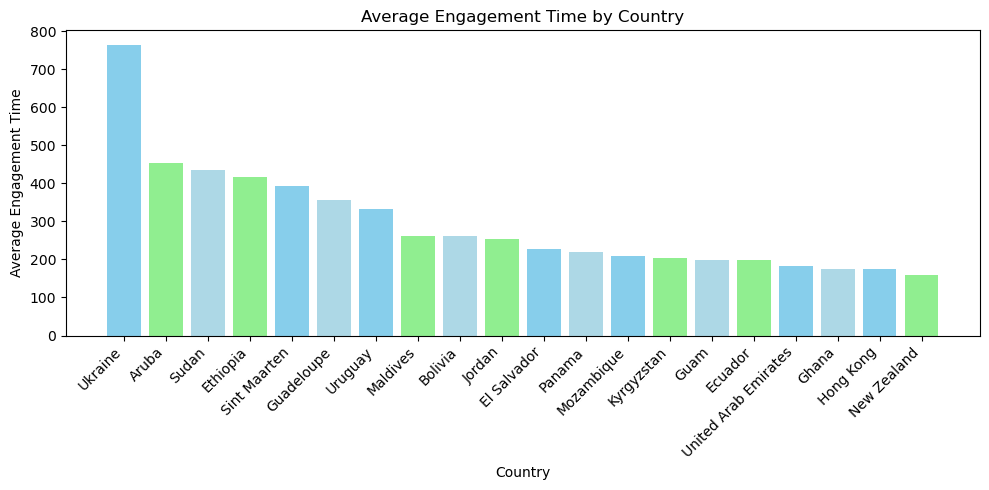

In [130]:
# Plotting the bar graph
colors = ['skyblue', 'lightgreen', 'lightblue', 'lightgreen', 'skyblue', 'lightblue']
plt.figure(figsize=(10, 5))
plt.bar(top_20_time['Country'], top_20_time['Average engagement time'], color= colors)
plt.xlabel('Country')
plt.ylabel('Average Engagement Time')
plt.title('Average Engagement Time by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Comment: when we measure the highest average engagement time, we can see that there are many countries that have not popped up previously but are interested in the products, including 5 Asia-Pacific countries, 4 African countries, and 3 South American countries. Those are also potential markets that we can target at in the future marketing plan. 

Recommended countries to target in the future:

In [158]:
df_sorted_Users = df.sort_values(by='Users', ascending=False)
top_20_users = df_sorted_Users[['Country']].head(50)
df_sorted_engaged = df.sort_values(by='Engaged sessions', ascending=False)
top_20_engaged = df_sorted_engaged[['Country']].head(50)
df_sorted_conversions = df.sort_values(by='Conversions', ascending=False)
top_20_conversions = df_sorted_conversions[['Country']].head(50)

In [167]:
#Find Countries that are overlapping in top 50 between Users,  Conversions, Engaged sessions
countries_engaged = set(top_20_engaged['Country'])
countries_conversions = set(top_20_conversions['Country'])
countries_users = set(top_20_users['Country'])

# Find the common countries in all three DataFrames
common_countries = countries_engaged.intersection(countries_conversions, countries_users)

# Print the common countries
print("Countries in both top 50 for Conversions and Users and Engaged Sessions:", common_countries)

Countries in both top 50 for Conversions and Users and Engaged Sessions: {'Mexico', 'Thailand', 'Canada', 'United States', 'Israel', 'Italy', 'Portugal', 'Netherlands', 'South Korea', 'Türkiye', 'United Arab Emirates', 'Russia', 'Australia', 'Nigeria', 'Germany', 'Philippines', 'India', 'South Africa', 'New Zealand', 'Spain', 'United Kingdom', 'Brazil', 'Singapore', 'Malaysia', 'Qatar', 'Egypt', 'Saudi Arabia'}


Part 2: What channels are the most effective to convert a visitor to a potential user?

In [ ]:
#calculate conversion rate

In [131]:
df_channel['conversion rate'] = df_channel['Conversions']/df_channel['New users']*100 
df_channel['conversion rate'] 

0    2.622378
1    0.193050
2    0.798655
3    1.115619
4    4.580153
5    0.000000
6    0.000000
Name: conversion rate, dtype: float64

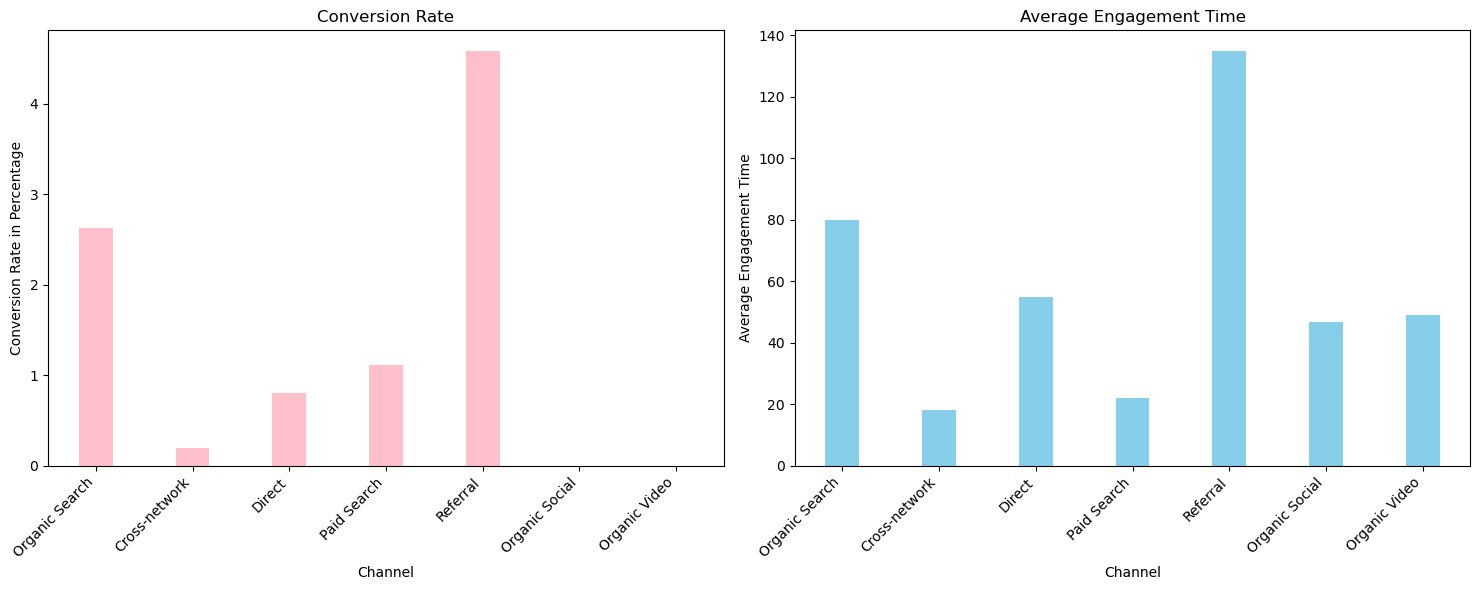

In [82]:
bar_positions = np.arange(len(df_channel['First user default channel group']))
bar_width = 0.35

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the bar graph for Conversion Rate on the left
axs[0].bar(bar_positions, df_channel['conversion rate'], width=bar_width, color='pink')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Conversion Rate in Percentage')
axs[0].set_title('Conversion Rate')
axs[0].set_xticks(bar_positions)
axs[0].set_xticklabels(df_channel['First user default channel group'], rotation=45, ha='right')

# Plotting the bar graph for Average Engagement Time on the right
axs[1].bar(bar_positions, df_channel['Average engagement time'], width=bar_width, color='skyblue')
axs[1].set_xlabel('Channel')
axs[1].set_ylabel('Average Engagement Time')
axs[1].set_title('Average Engagement Time')
axs[1].set_xticks(bar_positions)
axs[1].set_xticklabels(df_channel['First user default channel group'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Comment: the trend shown in Conversion Rate is very similar to the trend in Average Engagement Time. The Referral and Organic Search provides the highest ranking for both index, which means that they are the most effective ways to convert a potential customer to a user. For the future, we can try to prioritizing on the two channels to obtain the most efficient results. 

In [92]:
#Referral Rate
#new user/sum of new user
df_channel['rate']=df_channel['New users']/df_channel['New users'].sum()
df_channel

,First user default channel group,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue,conversion rate,rate
0,Organic Search,5720,4815,0.608646,0.841930,79.771988,56616,150,0,2.622378,0.445691
1,Cross-network,2590,920,0.327986,0.355350,18.224411,11546,5,0,0.193050,0.201808
2,Direct,2379,1442,0.402344,0.556113,54.718087,21623,19,0,0.798655,0.185367
3,Paid Search,1972,888,0.409783,0.450304,22.150101,10309,22,0,1.115619,0.153654
4,Referral,131,149,0.662222,1.137405,134.870229,2389,6,0,4.580153,0.010207
5,Organic Social,39,21,0.538462,0.538462,46.666667,289,0,0,0.000000,0.003039
6,Organic Video,3,3,0.600000,1.000000,49.000000,27,0,0,0.000000,0.000234


plt.figure(figsize=(6, 6))
plt.pie(df_channel['rate'], labels=df_channel['First user default channel group'],autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink'], labeldistance=1.2)
plt.title('Top 5 Countries with Most Users')
plt.show()


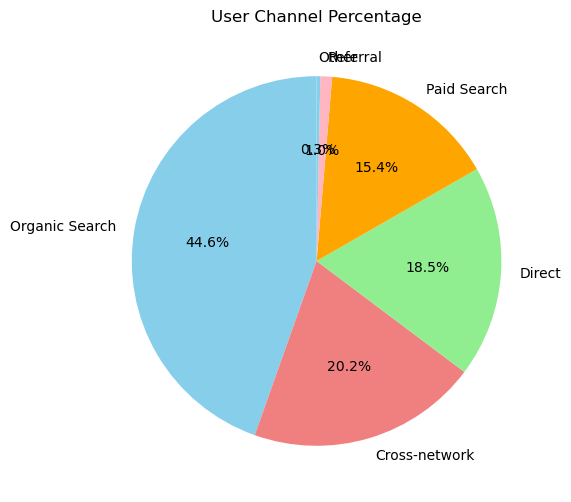

In [132]:
# Specify a threshold for section labels (e.g., 5%)
threshold = 0.01

# Create a pie chart with aggregated small sections
plt.figure(figsize=(6, 6))

# Identify sections above the threshold and group the rest into 'Other'
labels = df_channel['First user default channel group']
sizes = df_channel['rate']
mask = sizes > threshold
labels = labels[mask].tolist() + ['Other']
sizes = sizes[mask].tolist() + [sizes[~mask].sum()]

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink'])

# Set title
plt.title('User Channel Percentage')

# Show the plot
plt.show()

Comment: Looking at the percentage of User Channel, Organic Search plays 44.6% out of all channels, which is a reasonal number. However, the referral rate only accounts for less than 1%. Our priority should be setting up a referral program from our existing customers to increase sales. 

Conclusion:

We are able to examine potential ways to attract new customers through Google Analytics data from 01/01/2023 to 12/13/2023. Here are some business suggestions to increase revenue in the future: 

1. Create a Referral Program: 
Establish a referral program leveraging the observation that the Referral channel accounts for less than 1% but has shown to be highly effective in both Conversion Rate and Average Engagement Time. Encourage existing customers to refer others, focusing on building a network of satisfied customers who can contribute to increased sales.

2. Target New Markets and Countries:
Identify and target new markets based on the observation that there are countries with high engagement and interest in the products. Expand marketing efforts to these untapped regions, tailoring strategies to meet the specific needs and preferences of each market. I included the countries that show the overall greatest interest in the following list 1.

3. Implement Website Translations:
Address the discrepancy between Users and Conversions in Vietnam and Indonesia by implementing website translations. Build a feature for auto-translation to enhance the user experience, especially in non-English speaking countries, where there is a notable difference in engagement rates.
Prioritize Keyword Optimization for Organic Search:

4. Continue prioritizing keyword optimization for Organic Search: 
Organic Search plays a significant role, contributing 44.6% of all User Channels. Focus on SEO strategies to maintain and improve visibility, ensuring the company remains prominent in search engine results to drive organic traffic.

list 1: 

1. North America:
Mexico
Canada
United States

2. Europe:
Italy
Portugal
Netherlands
Germany
Spain
United Kingdom
Russia
Turkey (Türkiye)

3. Asia:
Thailand
Israel
South Korea
United Arab Emirates
Philippines
India
Australia
Singapore
Malaysia
Qatar
Saudi Arabia

4. Africa:
Nigeria
South Africa
Egypt

5. Oceania:
New Zealand

6. South America:
Brazil